# Describe Collection

Notebook that generally describes the outline of both Mitchell and JISC corpus

In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

In [3]:
df = pd.read_csv('output_data/MPD_export_1846_1920_JISC.csv', index_col=0)
df.head()

,index,id,S-TITLE,S-POL,CATEGORY,DISTRICT,DISTRICT_PUB,COUNTY,S-PRICE,D-EST,D-PUB,E-LOC,E-ORG,E-PER,S-TITLE-ALT,TEXT,DISTRICT_DESCRIPTION,year,chain_id,JISC
0,0,MPD_1846_0,MORNING ADVERTISER .,liberal,london,london,london,london,5d,"February 8 , 1793",Daily,NaN,NaN,David,NaN,"MORNING ADVERTISER . Daily , Price 5d . Establ...",London,1846,CID_004463,NaN
1,1,MPD_1846_1,MORNING CHRONILE .,moderate;,london,london,london,london,5d,1770,Daily,",<SEP>332",NaN,Henry<SEP>William Wills,NaN,"MORNING CHRONILE . Daily , Price 5d . Establis...",London,1846,CID_004464,13915254.0
2,2,MPD_1846_2,DAILY NEWS .,liberal; democratic,london,london,london,london,5d,"January 21 , 1846",Daily,to . The leading minds in have not re ceived,the,particular France,NaN,"DAILY NEWS . Daily , Price 5d . Established Ja...",London,1846,NaN,NaN
3,3,MPD_1846_3,MORNING HERALD .,conservative; protectionist; episcopal,london,london,london,london,5d,1781,Daily,", ,",NaN,George Chapman Shoe Lance Fleet,NaN,"MORNING HERALD . Daily , Price 5d . Establishe...",NaN,1846,CID_003657,NaN
4,4,MPD_1846_4,IRON TIMES .,anti-corn-law,london,london,london,london,6d,July 7 . 1845,Daily,"112 , Flect Strect",NaN,John Neale,NaN,"IRON TIMES . Daily , Price 6d . Established Ju...",NaN,1846,NaN,NaN


In [4]:

df_london = df[df.CATEGORY=='london']

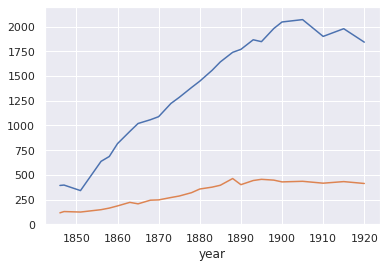

In [5]:
df_prov = df[df.CATEGORY.isin(['irish','welsh','provincial','scottish'])]
df_prov.groupby('year')['id'].count().plot(ylim=(0,2200))
df_london.groupby('year')['id'].count().plot()


In [6]:
jisc_meta = pd.read_excel('./newspaper_metadata/JISC1+2CombinedTitleList_v1_15052020.xlsx', sheet_name='Titles')

In [7]:
year2jisc_counts = {}

jsp = jisc_meta[jisc_meta.CATEGORY.isin(['scottish','welsh','provincial','irish'])]
for y in df_prov.year.unique():
    if y <= 1900:
        year2jisc_counts[y] = jsp[(jsp.Start_year < y) &  (jsp.End_year >= y) ].shape[0]

year
1846    32
1847    32
1851    28
1856    35
1858    36
1860    36
1863    38
1865    38
1868    36
1870    39
1873    41
1875    41
1878    42
1880    41
1883    37
1885    40
1888    40
1890    38
1893    39
1895    38
1898    37
1900    35
1905    32
1910    30
1915    27
1920    24
Name: index, dtype: int64

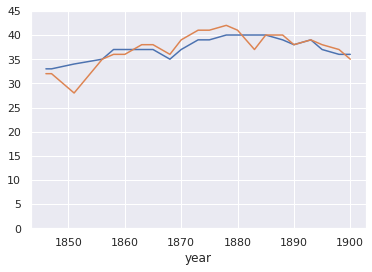

In [8]:
pd.Series(year2jisc_counts).plot(ylim=(0,45))
df_prov[(~df_prov.JISC.isnull()) & (df_prov.year <= 1900)].groupby('year')['index'].count().plot()

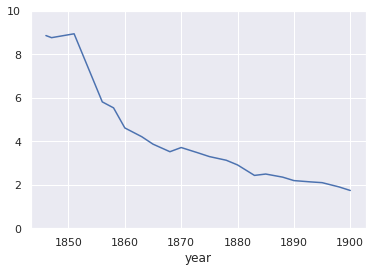

In [14]:
nom = df_prov[(~df_prov.JISC.isnull()) & (df_prov.year <= 1900)].groupby('year')['index'].count() 
denom = df_prov[(df_prov.JISC.isnull()) & (df_prov.year <= 1900)].groupby('year')['index'].count() 
((nom / denom )* 100).plot(ylim=(0,10))
